In [1]:
import re
import pandas as pd
import os
import csv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
beers_csv = "beers.csv"
breweries_csv = "breweries.csv"

beers_df = pd.read_csv(beers_csv)
breweries_df = pd.read_csv(breweries_csv)
beers_df.head()

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


In [3]:
breweries_df = breweries_df.rename(columns={"Unnamed: 0":"brewery_id"})
breweries_df

,brewery_id,name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA
...,...,...,...,...
553,553,Covington Brewhouse,Covington,LA
554,554,Dave's Brewfarm,Wilson,WI
555,555,Ukiah Brewing Company,Ukiah,CA
556,556,Butternuts Beer and Ale,Garrattsville,NY


In [4]:
# pd.merge(beers_df, breweries_df, )
poop_df = breweries_df.merge(beers_df, on="brewery_id")
#poop_df.to_csv("poop.csv")

In [5]:
poop_df.nlargest(5,['abv'])

,brewery_id,name_x,city,state,Unnamed: 0,abv,ibu,id,name_y,style,ounces
374,51,Upslope Brewing Company,Boulder,CO,2278,0.128,NaN,2565,Lee Hill Series Vol. 5 - Belgian Style Quadrup...,Quadrupel (Quad),19.2
7,1,Against the Grain Brewery,Louisville,KY,70,0.125,80.0,2685,London Balling,English Barleywine,16.0
143,17,Tin Man Brewing Company,Evansville,IN,2189,0.120,90.0,2621,Csar,Russian Imperial Stout,16.0
375,51,Upslope Brewing Company,Boulder,CO,2279,0.104,NaN,2564,Lee Hill Series Vol. 4 - Manhattan Style Rye Ale,Rye Beer,19.2
335,46,Sixpoint Craft Ales,Brooklyn,NY,1857,0.100,52.0,2574,4Beans,Baltic Porter,12.0


In [6]:
print(beers_df.abv.describe())

count    2348.000000
mean        0.059773
std         0.013542
min         0.001000
25%         0.050000
50%         0.056000
75%         0.067000
max         0.128000
Name: abv, dtype: float64


In [7]:
beers_df['style'].value_counts()[:15]

American IPA                      424
American Pale Ale (APA)           245
American Amber / Red Ale          133
American Blonde Ale               108
American Double / Imperial IPA    105
American Pale Wheat Ale            97
American Brown Ale                 70
American Porter                    68
Saison / Farmhouse Ale             52
Witbier                            51
Fruit / Vegetable Beer             49
Kölsch                             42
Hefeweizen                         40
American Stout                     39
American Pale Lager                39
Name: style, dtype: int64

Text(0, 0.5, 'Count of Beer')

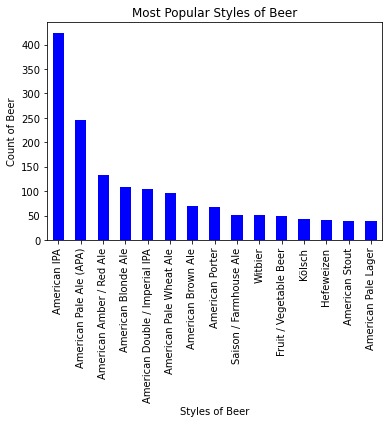

In [8]:
beers_df['style'].value_counts()[:15].plot(kind = "bar", color = "blue")
plt.title("Most Popular Styles of Beer")
plt.xlabel("Styles of Beer")
plt.ylabel("Count of Beer")

Text(0.5, 1.0, 'Distribution of Alcohol By Volume')

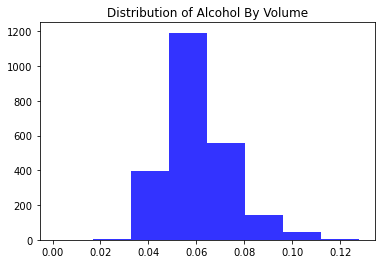

In [9]:
plt.hist("abv", 8, data = beers_df, alpha = 0.8, color = "blue")
plt.title("Distribution of Alcohol By Volume")

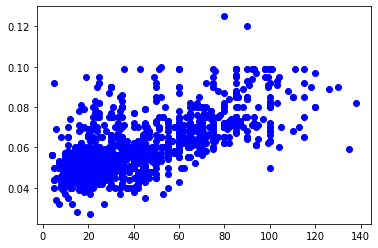

In [10]:
plt.scatter("ibu", "abv", data = beers_df, color = "blue")